<a href="https://colab.research.google.com/github/FayAljumah/Ant-Colony-Optimization-on-TaSch/blob/main/New_OM_ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class AntColonyOptimization:
    def __init__(self, num_tasks, num_vms, exec_times, num_ants=10, iterations=100, alpha=1, beta=2, evaporation=0.5):
        self.num_tasks = num_tasks
        self.num_vms = num_vms
        self.exec_times = exec_times
        self.num_ants = num_ants
        self.iterations = iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.pheromone = np.ones((num_tasks, num_vms))
        self.best_solution = None
        self.best_makespan = float('inf')

    def probability(self, task, vm):
        pheromone = self.pheromone[task, vm] ** self.alpha
        heuristic = (1 / self.exec_times[task, vm]) ** self.beta
        return pheromone * heuristic

    def assign_tasks(self):
        solutions = []
        for _ in range(self.num_ants):
            assignment = []
            for task in range(self.num_tasks):
                probabilities = [self.probability(task, vm) for vm in range(self.num_vms)]
                probabilities /= np.sum(probabilities)
                selected_vm = np.random.choice(self.num_vms, p=probabilities)
                assignment.append(selected_vm)
            solutions.append(assignment)
        return solutions

    def evaluate_solution(self, assignment):
        vm_times = np.zeros(self.num_vms)
        for task, vm in enumerate(assignment):
            vm_times[vm] += self.exec_times[task, vm]
        return max(vm_times)

    def update_pheromone(self, solutions, makespans):
        self.pheromone *= (1 - self.evaporation)
        for assignment, makespan in zip(solutions, makespans):
            contribution = 1.0 / makespan
            for task, vm in enumerate(assignment):
                self.pheromone[task, vm] += contribution

    def optimize(self):
        import time
        start_time = time.time()
        for _ in range(self.iterations):
            solutions = self.assign_tasks()
            makespans = [self.evaluate_solution(sol) for sol in solutions]
            best_idx = np.argmin(makespans)
            if makespans[best_idx] < self.best_makespan:
                self.best_makespan = makespans[best_idx]
                self.best_solution = solutions[best_idx]
            self.update_pheromone(solutions, makespans)
        execution_time = time.time() - start_time
        return self.best_solution, self.best_makespan, execution_time

# Parameters
num_vms = 10  # Fixed number of virtual machines
num_tasks_range = np.arange(10, 110, 10)  # From 10 to 100 tasks
num_experiments = 10  # 10 random experiments per task size
makespan_results = {}
execution_times = {}

for num_tasks in num_tasks_range:
    experiment_makespans = []
    experiment_exec_times = []
    for _ in range(num_experiments):
        exec_times = np.random.randint(100, 1001, size=(num_tasks, num_vms))
        aco = AntColonyOptimization(num_tasks, num_vms, exec_times)
        _, best_makespan, exec_time = aco.optimize()
        experiment_makespans.append(best_makespan)
        experiment_exec_times.append(exec_time)
    makespan_results[num_tasks] = experiment_makespans
    execution_times[num_tasks] = experiment_exec_times


In [ ]:
import pandas as pd

# إنشاء DataFrame لعرض Makespan Results
makespan_df = pd.DataFrame.from_dict(makespan_results, orient='index')
makespan_df.index.name = "Number of Tasks"
makespan_df.columns = [f"Experiment {i+1}" for i in range(num_experiments)]

# إنشاء DataFrame لعرض Execution Times
execution_df = pd.DataFrame.from_dict(execution_times, orient='index')
execution_df.index.name = "Number of Tasks"
execution_df.columns = [f"Experiment {i+1}" for i in range(num_experiments)]

print("\n=== Makespan Results ===")
print(makespan_df.to_string())  # طباعة النتائج كجدول نصي

print("\n=== Execution Times ===")
print(execution_df.to_string())  # طباعة جدول أزمنة التنفيذ


=== Makespan Results ===
                 Experiment 1  Experiment 2  Experiment 3  Experiment 4  Experiment 5  Experiment 6  Experiment 7  Experiment 8  Experiment 9  Experiment 10
Number of Tasks                                                                                                                                             
10                      484.0         419.0         485.0         408.0         415.0         661.0         551.0         663.0         389.0          371.0
20                      662.0         689.0         729.0         526.0         489.0         561.0         602.0         662.0         637.0          801.0
30                      774.0         735.0         708.0        1021.0         767.0         827.0         771.0         869.0         933.0          735.0
40                     1324.0        1121.0         939.0        1111.0        1014.0         951.0        1176.0         856.0        1067.0         1026.0
50                     1104.0   

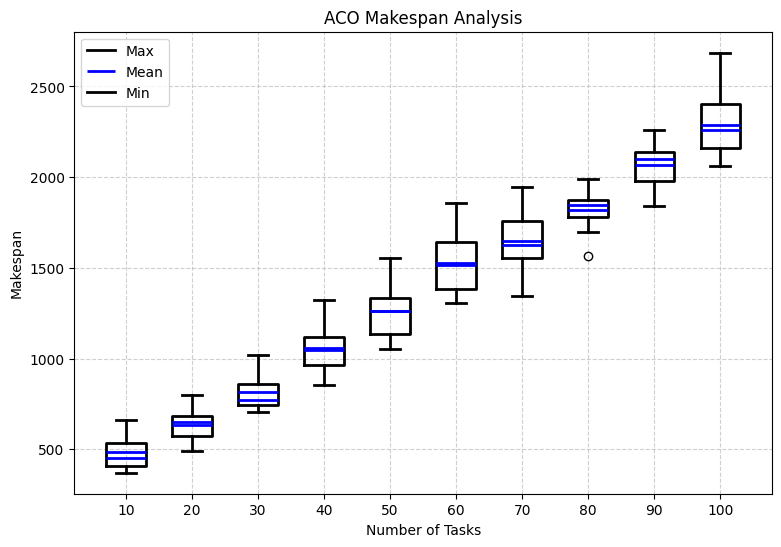

In [ ]:

# Extracting mean, min, and max values for plotting
means_makespan = [np.mean(makespan_results[n]) for n in num_tasks_range]
mins_makespan = [np.min(makespan_results[n]) for n in num_tasks_range]
maxs_makespan = [np.max(makespan_results[n]) for n in num_tasks_range]

# Box Plot for Makespan
fig, ax1 = plt.subplots(figsize=(9, 6))
ax1.boxplot([makespan_results[n] for n in num_tasks_range], positions=num_tasks_range, showmeans=True, meanline=True, widths=6, boxprops=dict(color='black', linewidth=2), whiskerprops=dict(linewidth=2), capprops=dict(linewidth=2), medianprops=dict(color='blue', linewidth=2), meanprops=dict(color='blue', linewidth=2, linestyle='-'))
ax1.set_xlabel("Number of Tasks")
ax1.set_ylabel("Makespan")
ax1.set_title("ACO Makespan Analysis")
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(["Max", "Mean", "Min"], loc='upper left')
plt.show()


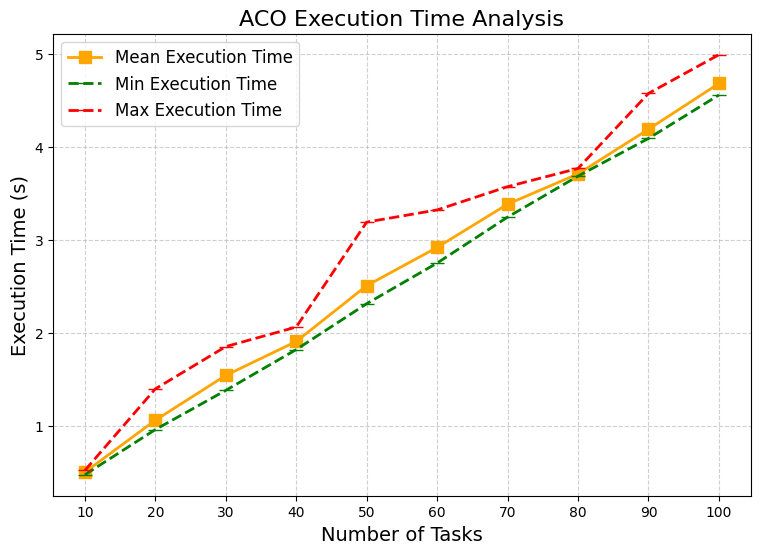

In [ ]:
# Extracting mean, min, and max values for plotting
means_exec_time = [np.mean(execution_times[n]) for n in num_tasks_range]
mins_exec_time = [np.min(execution_times[n]) for n in num_tasks_range]
maxs_exec_time = [np.max(execution_times[n]) for n in num_tasks_range]

# Plot for Execution Time
fig, ax2 = plt.subplots(figsize=(9, 6))
ax2.plot(num_tasks_range, means_exec_time, marker='s', linestyle='-', label='Mean Execution Time', color='orange', linewidth=2, markersize=8)
ax2.plot(num_tasks_range, mins_exec_time, marker='_', linestyle='--', label='Min Execution Time', color='g', linewidth=2, markersize=10)
ax2.plot(num_tasks_range, maxs_exec_time, marker='_', linestyle='--', label='Max Execution Time', color='r', linewidth=2, markersize=10)
ax2.set_xlabel("Number of Tasks", fontsize=14)
ax2.set_xticks(num_tasks_range)
ax2.set_ylabel("Execution Time (s)", fontsize=14)
ax2.set_title("ACO Execution Time Analysis", fontsize=16)
ax2.legend(fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
plt.show()

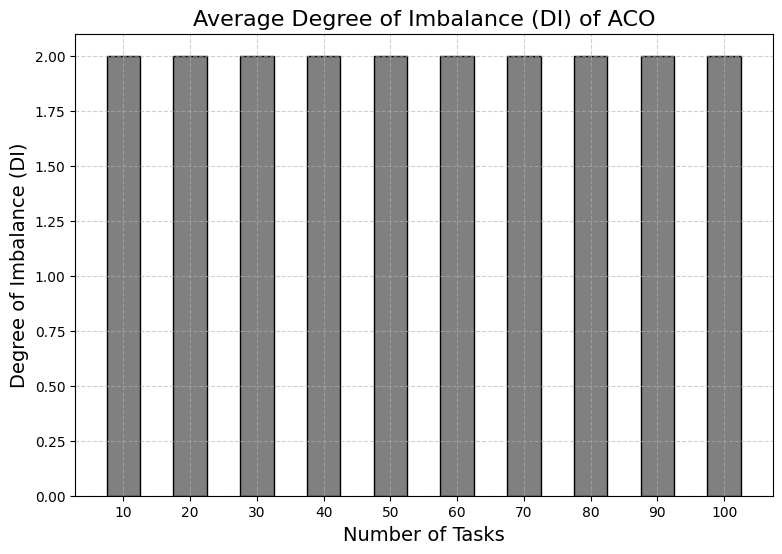

In [ ]:
# Function to calculate Degree of Imbalance (DI)
def calculate_degree_of_imbalance(exec_times):
    T_max = np.max(exec_times, axis=1)  # حساب أكبر قيمة لكل تجربة
    T_min = np.min(exec_times, axis=1)  # حساب أصغر قيمة لكل تجربة
    T_avg = np.mean(exec_times, axis=1)  # حساب متوسط القيم لكل تجربة
    DI = (T_max + T_min) / T_avg  # حساب درجة التوازن
    return DI

# Calculate DI based on execution_times
di_results = {}
for num_tasks in num_tasks_range:
    experiment_dis = []
    exec_times_array = np.array(execution_times[num_tasks])  # تحويل القيم لمصفوفة
    di = calculate_degree_of_imbalance(exec_times_array.reshape(num_experiments, 1))  # تمرير المصفوفة بشكل صحيح
    experiment_dis.extend(di)  # إضافة جميع القيم لحساب المتوسط لاحقًا
    di_results[num_tasks] = experiment_dis

# Compute statistics for DI
means_di = [np.mean(di_results[n]) for n in num_tasks_range]

# Plot Degree of Imbalance
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(num_tasks_range, means_di, width=5, label="ACO", color='gray', edgecolor='black')

ax.set_xlabel("Number of Tasks", fontsize=14)
ax.set_xticks(num_tasks_range)
ax.set_ylabel("Degree of Imbalance (DI)", fontsize=14)
ax.set_title("Average Degree of Imbalance (DI) of ACO", fontsize=16)
#ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()
